In [1]:
import numpy as np
import pandas as pd

from sklearn.manifold import Isomap,locally_linear_embedding,spectral_embedding,MDS,TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist,pdist
import skbio
import sklearn.cluster as cluster
import hdbscan
import sklearn.preprocessing
from sklearn import metrics
from sklearn.decomposition import KernelPCA

# Data

In [2]:
otudf =pd.read_csv(filepath_or_buffer="otudf",index_col=0)
wwfdf = pd.read_csv(filepath_or_buffer="wwfdf",encoding="ISO-8859-1",index_col = "ID")
wwfdfmin = pd.read_csv(filepath_or_buffer="wwfdfmin",encoding="ISO-8859-1",index_col = "ID")
nmds20  = pd.read_csv(filepath_or_buffer="nmds20dim",index_col=0)



# Black water sites. There are 21 black water sites and 143 white water
blackindex = wwfdf[wwfdf["Water"] == "Black"].index
# otudfCss =pd.read_csv(filepath_or_buffer="otudfCss",index_col=0)
# otudfMinCss =pd.read_csv(filepath_or_buffer="otudfMinCss",index_col=0)
# otudfLow = pd.read_csv(filepath_or_buffer="otudfLow",index_col=0)
# otudfCssLog = pd.read_csv(filepath_or_buffer="otudfCssLog",index_col=0)


# River dataset; everything that lives in the river
riverdf = pd.read_csv("riverdf",index_col=0)
riverdfCss = pd.read_csv("riverdfcss",index_col=0)
riverdfCssLog = pd.read_csv("riverdfcsslog",index_col=0)
riverdf100s = pd.read_csv("riverdf100s",index_col=0)
riverdf100sCss = pd.read_csv("riverdf100scss",index_col=0)
riverdf100sCssLog = pd.read_csv("riverdf100scsslog",index_col=0)
#rivindex =(riverdf.riverAssociated == "yes").values
river_s_ind = riverdf100s.index

#To test animals no in river we just invert the rivindex
# We also get the index of samples with non zero otu counts
# nonzero_invrivindex =otudf.loc[:,np.invert(rivindex)].sum(axis=1) !=0

wwfdf.Water =(wwfdf.Water =="White")*1
wwfdfmin.Water =(wwfdfmin.Water =="White")*1
#Importing taxonomy
taxadf = pd.read_csv(filepath_or_buffer="taxadf",index_col=0)
# Splitting training and test data
# np.random.seed(11235)
# X_train,X_test,y_train,y_test = train_test_split(otudf.loc[:,rivindex],wwfdf.Water,test_size = 0.2)
# np.random.seed(11235)
# Xn_train,Xn_test,y_train,y_test = train_test_split(nmds20,wwfdf.Water,test_size = 0.2)

# Embeddings/ Dimensionality reduction

In [94]:
def plotembedding(X,title):
    fig, ax = plt.subplots(figsize = (7,7))
    cmap = plt.get_cmap('tab10')
    color_pallette = [cmap(i) for i in np.linspace(0,1,10)]
    colors = [color_pallette[k] for k in wwfdf.Area_group]
    sns.set_style()
    sns.scatterplot(ax=ax,x=X[:,0],y=X[:,1],hue=wwfdf.Area_group_name.to_list(),style=wwfdf.Water.to_list())
#     ax.legend()
    plt.title(title)
    plt.show()

Isomap

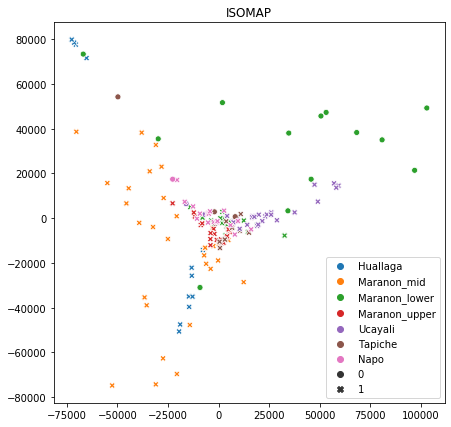

In [95]:
%matplotlib inline
isoembedding = Isomap(n_components=2)
X_transformed = isoembedding.fit_transform(riverdf)
plotembedding(X_transformed,"ISOMAP")

In [61]:
X_lle = locally_linear_embedding(riverdf,n_components=2,n_neighbors=1,method = 'ltsa')
print(X_lle[1])
plotembedding(X_lle[0])

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


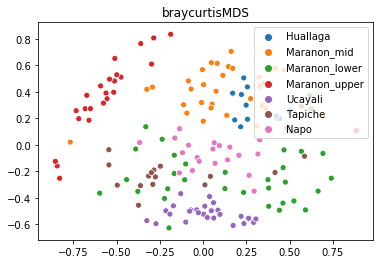

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.18811303891975664 and the largest is 9.181057410853073.
  RuntimeWarning


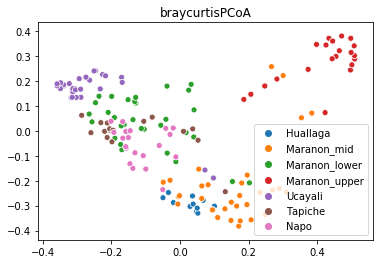

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


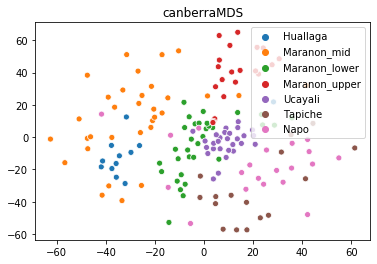

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -3637.419518906334 and the largest is 46524.79403669444.
  RuntimeWarning


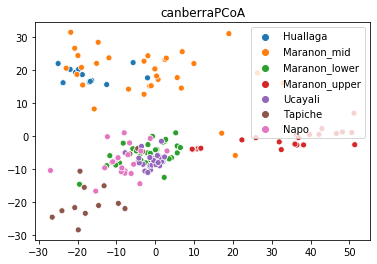

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


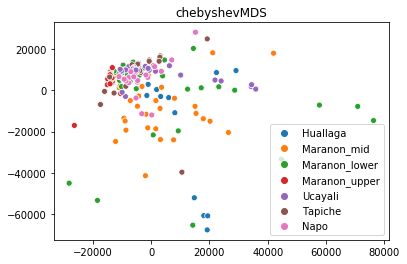

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -4767699959.056833 and the largest is 39295121490.847336.
  RuntimeWarning


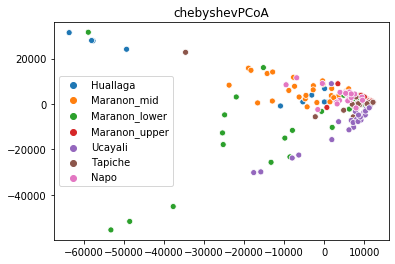

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


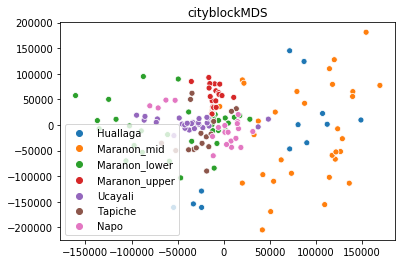

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -66479699848.38579 and the largest is 309987776469.9658.
  RuntimeWarning


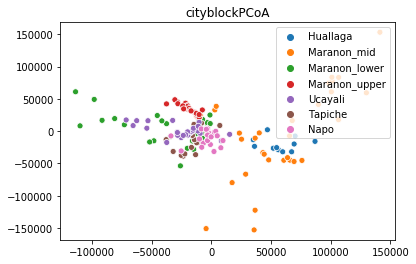

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


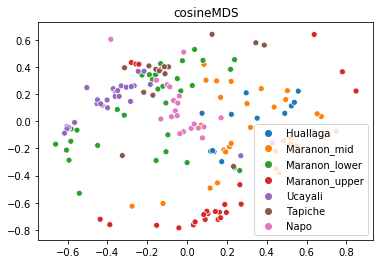

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


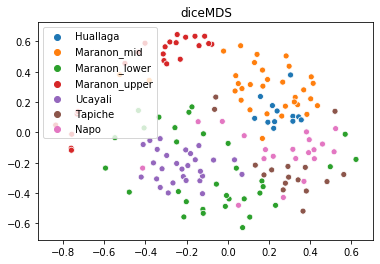

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.19507285117311501 and the largest is 7.414225537284715.
  RuntimeWarning


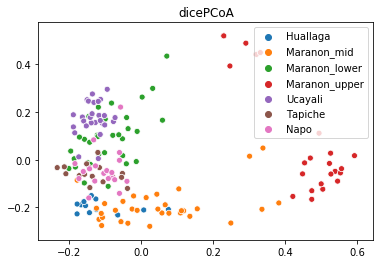

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


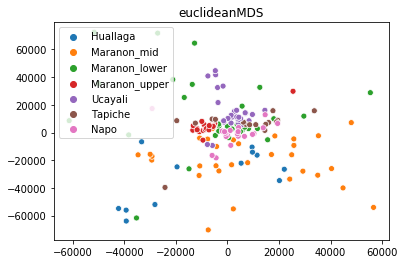

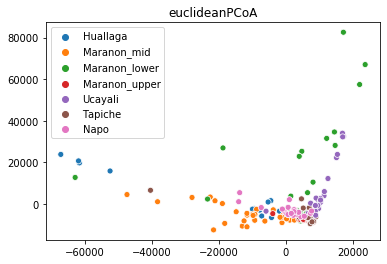

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


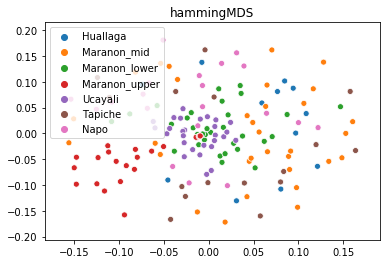

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.05773597105289556 and the largest is 0.21759775216572624.
  RuntimeWarning


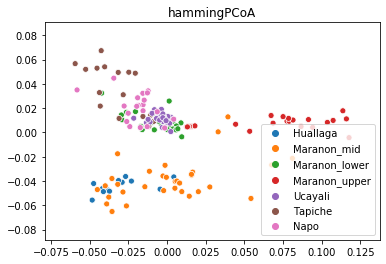

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


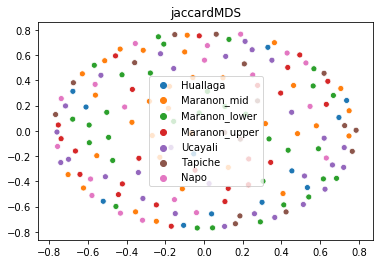

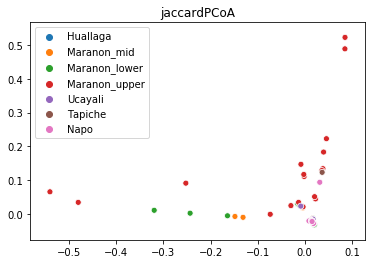

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


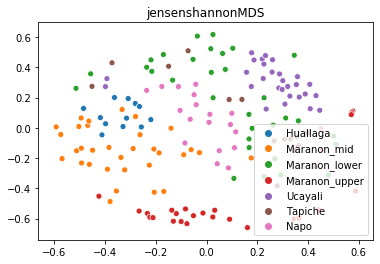

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


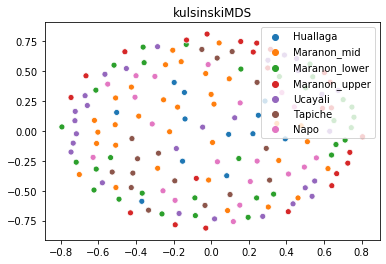

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.0s finished


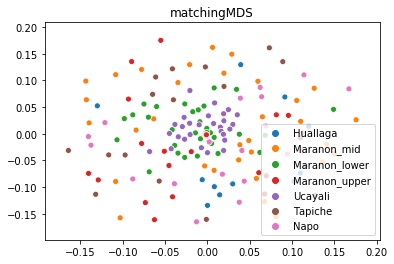

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.05773597105289556 and the largest is 0.21759775216572624.
  RuntimeWarning


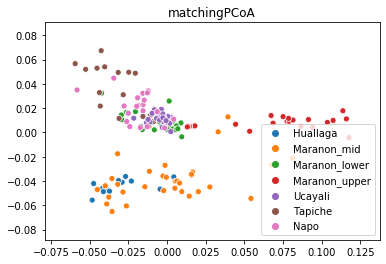

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.3s finished


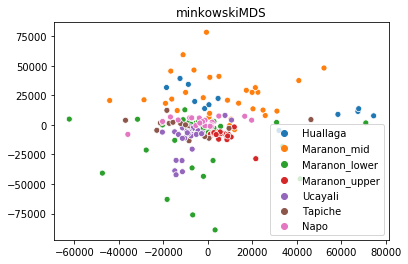

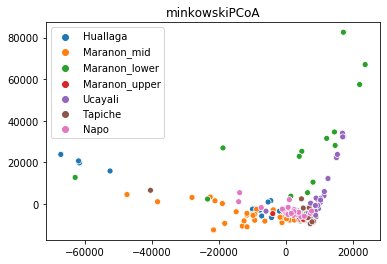

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


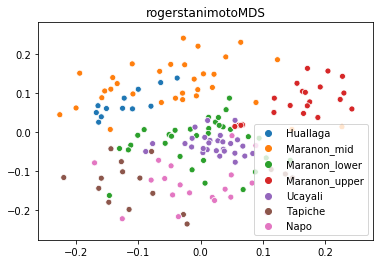

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.035476719307592344 and the largest is 0.8569773933263851.
  RuntimeWarning


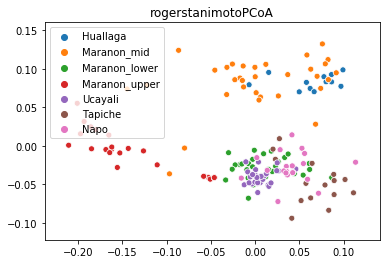

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


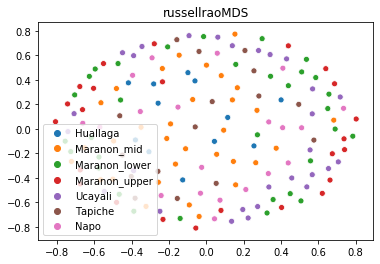

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


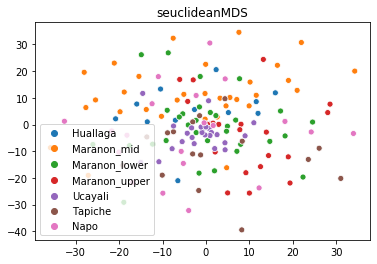

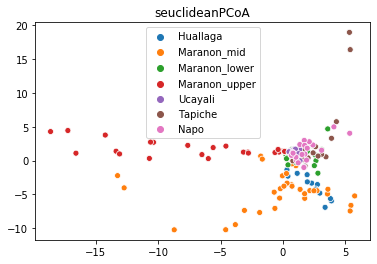

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


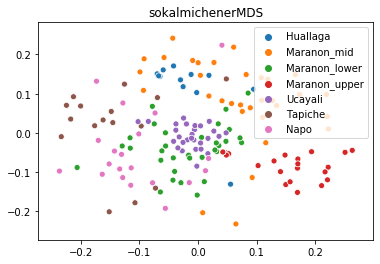

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.035476719307592344 and the largest is 0.8569773933263851.
  RuntimeWarning


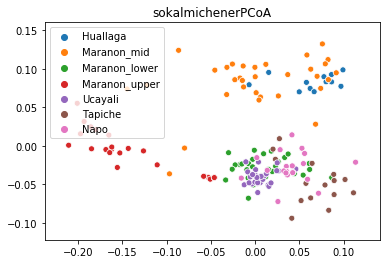

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


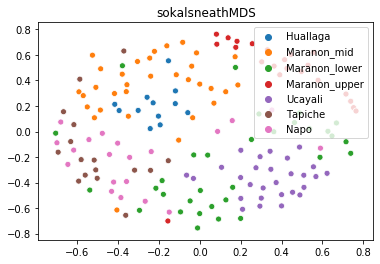

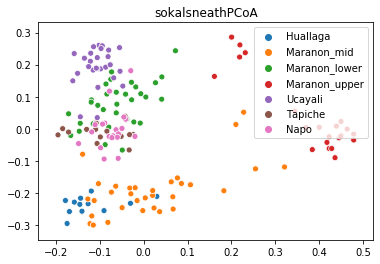

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.2s finished


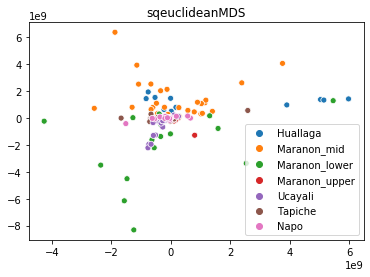

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -1.34014408398483e+20 and the largest is 3.747401979805314e+20.
  RuntimeWarning


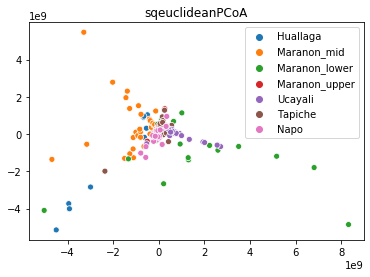

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    0.1s finished


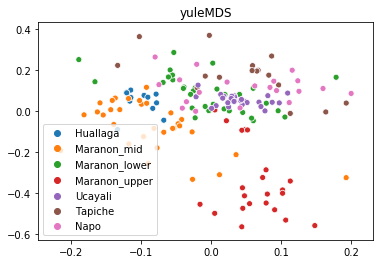

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -2.3185124927866143 and the largest is 7.521572008521219.
  RuntimeWarning


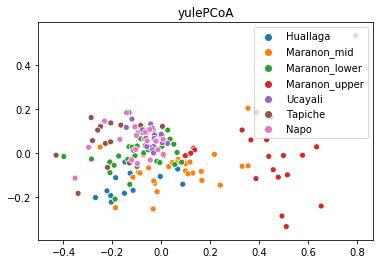

In [64]:
for i in ["braycurtis","canberra", "chebyshev", "cityblock", "cosine", "dice", "euclidean", 
          "hamming", "jaccard", "jensenshannon", "kulsinski", "matching", "minkowski", 
          "rogerstanimoto", "russellrao", "seuclidean", "sokalmichener", "sokalsneath", "sqeuclidean",
          "yule"]:
    
    X_bray =cdist(riverdf,riverdf,metric = i)
    MDSembedding = MDS(n_components=2,n_jobs =-1,dissimilarity='precomputed',metric= True,verbose=10)
    X_mds = MDSembedding.fit_transform(X_bray)
    plotembedding(X_mds,title = i+"MDS")

    try:
        X_bio = skbio.stats.ordination.pcoa(X_bray)
        plotembedding(X_bio.samples.to_numpy(),title= i+"PCoA")
    except Exception as DistanceMatrixError:
        pass


In [98]:
dist_tsne = ["braycurtis","canberra", "chebyshev", "cityblock", "cosine", "dice", "euclidean", 
          "hamming", "jaccard", "kulsinski", "matching", "minkowski", 
          "rogerstanimoto", "russellrao", "sokalmichener", "sokalsneath", "sqeuclidean",
          "yule"]

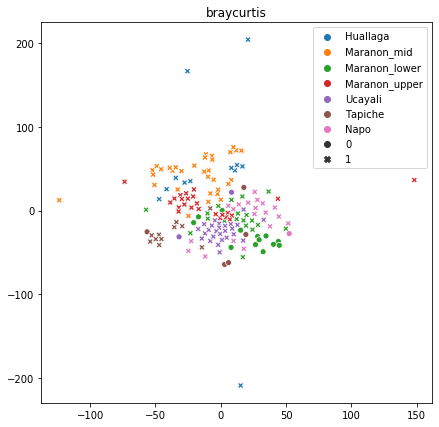

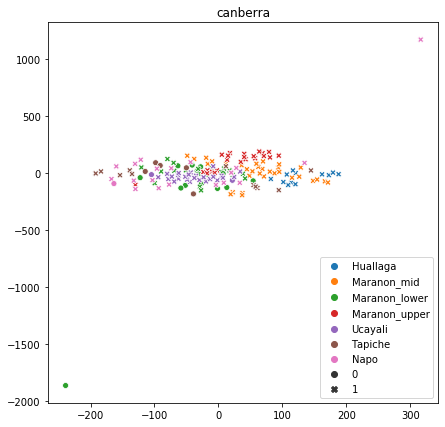

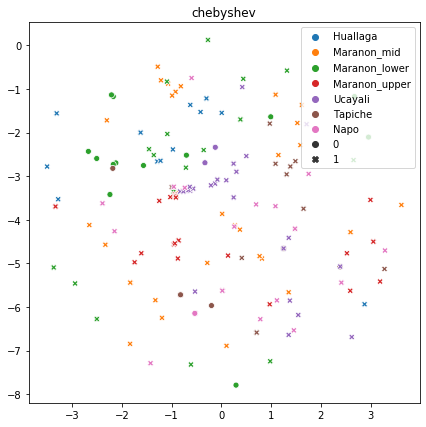

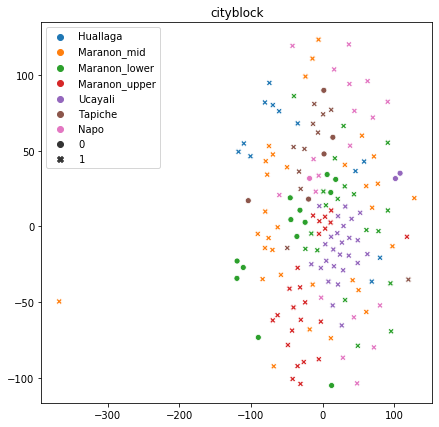

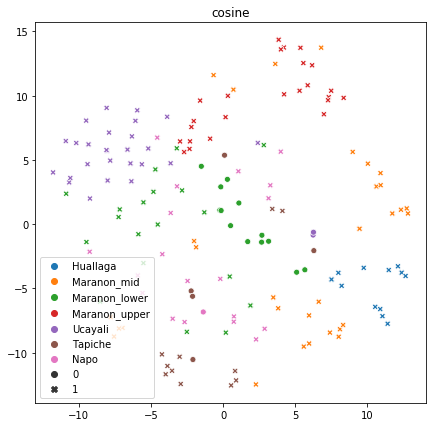

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


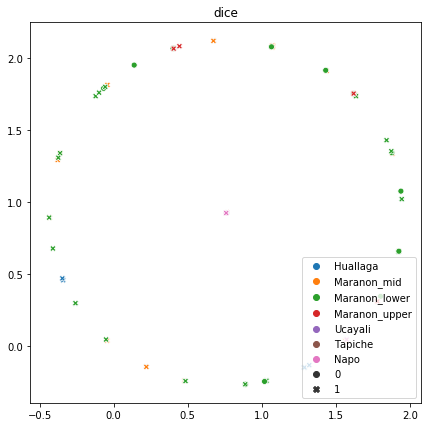

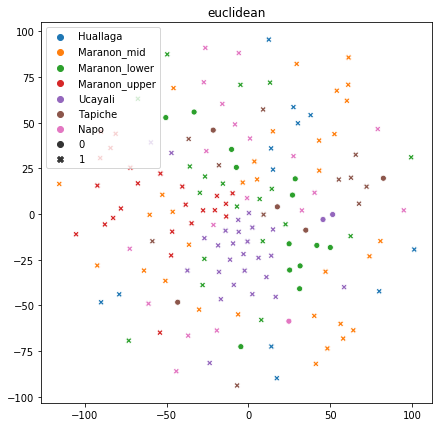

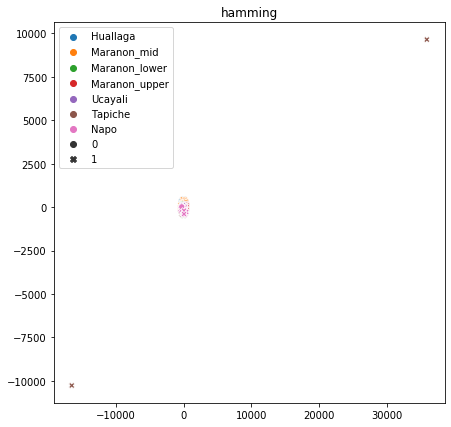

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


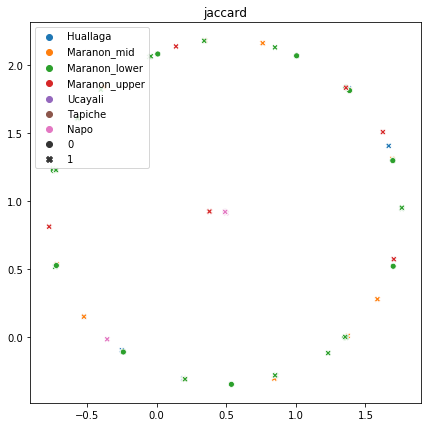

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


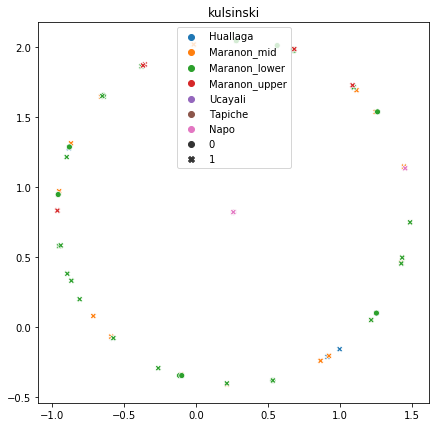

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


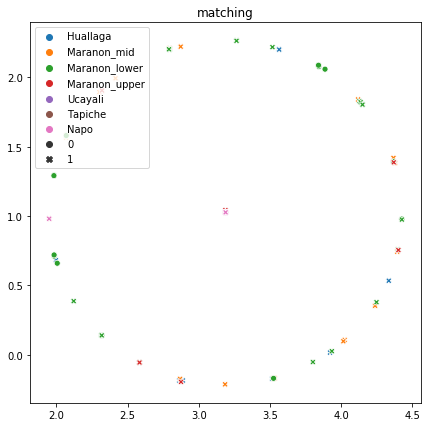

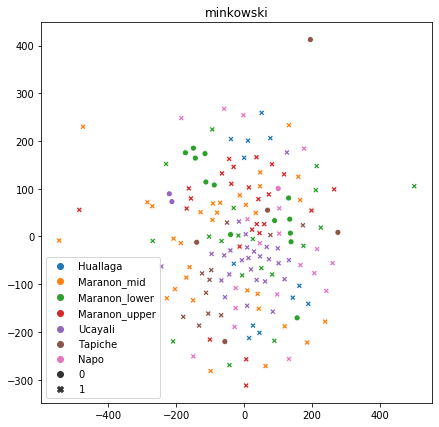

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


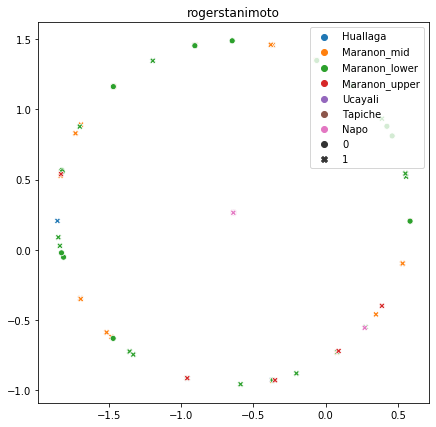

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


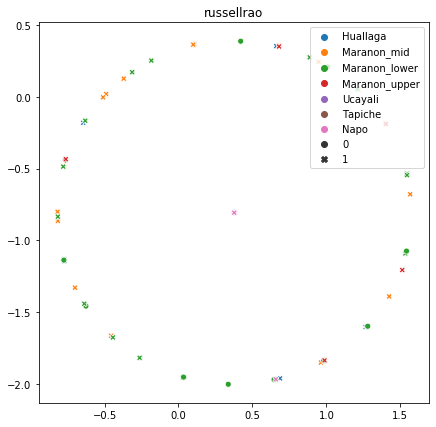

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


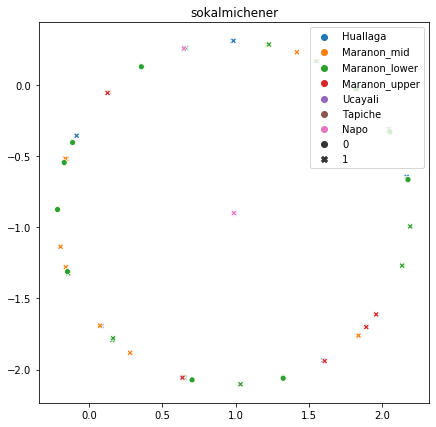

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


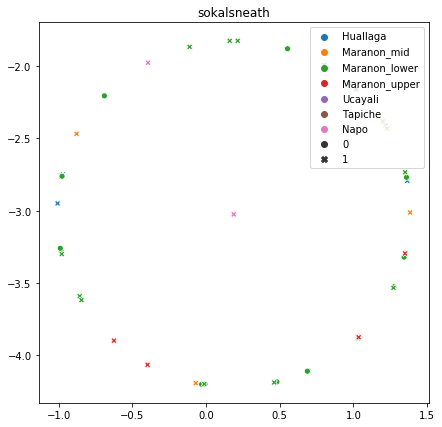

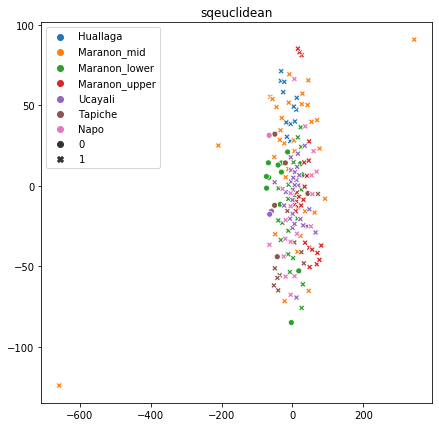

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


AssertionError: All probabilities should be finite

In [99]:

for i in dist_tsne:
    
    X_tsne = TSNE(metric=i,perplexity=30).fit_transform(riverdf_sc)
    plotembedding(X_tsne,title=i)

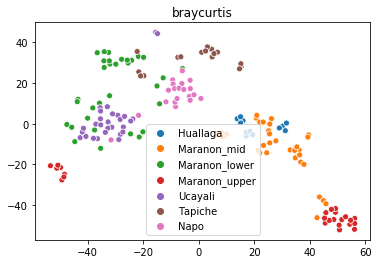

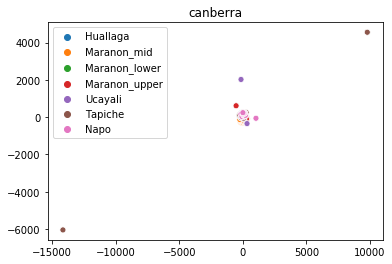

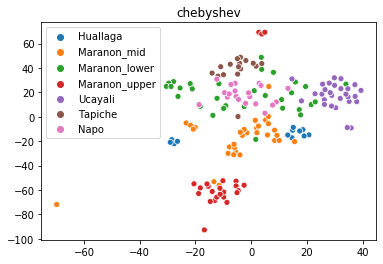

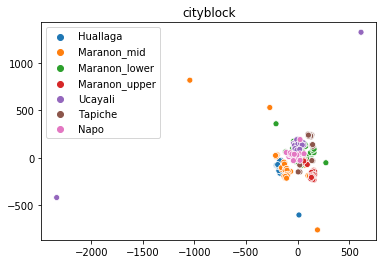

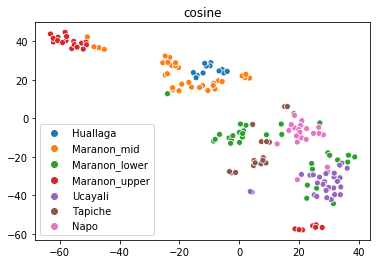

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


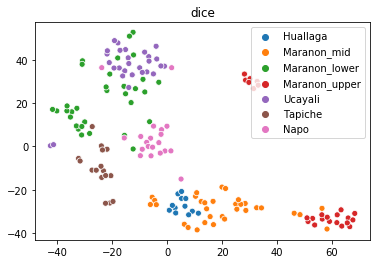

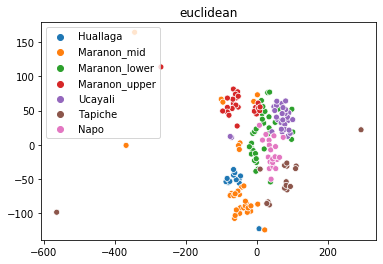

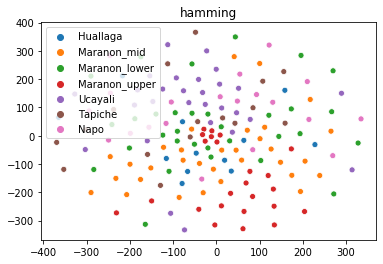

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


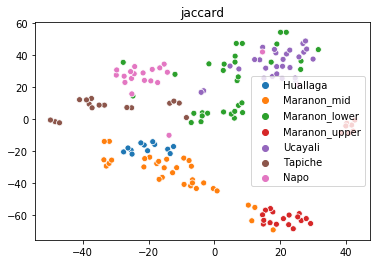

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


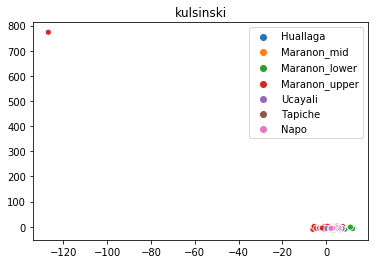

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


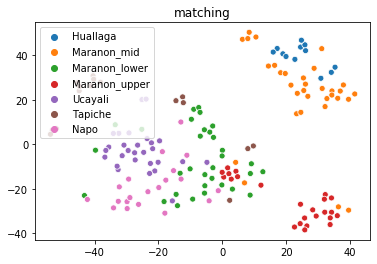

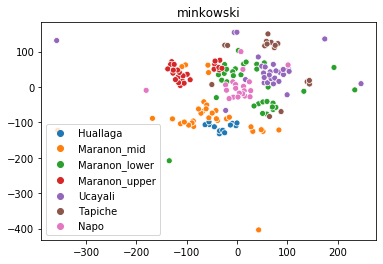

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


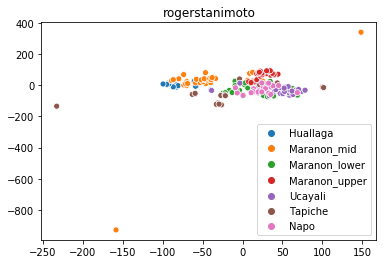

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


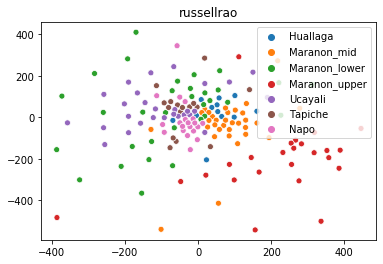

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


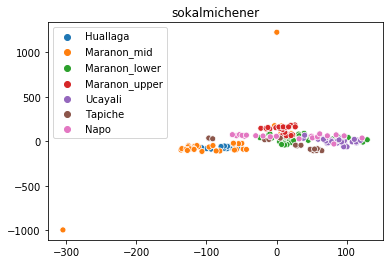

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


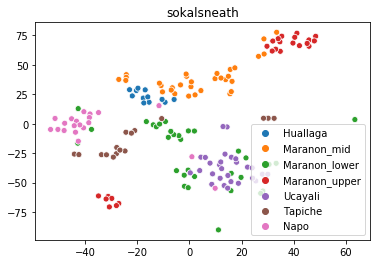

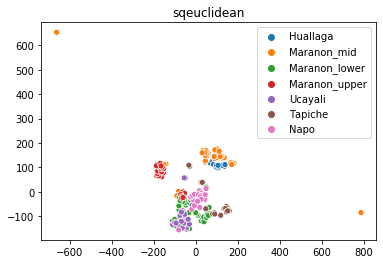

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


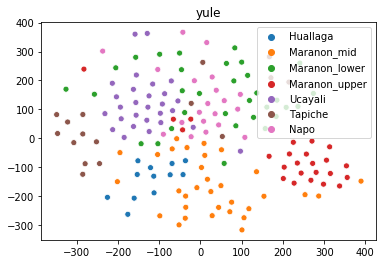

In [85]:
for i in dist_tsne:
    X_tsne = TSNE(metric=i,perplexity=10,method = "exact",n_iter=2000,learning_rate=300).fit_transform(riverdfCssLog)
    plotembedding(X_tsne,title=i)

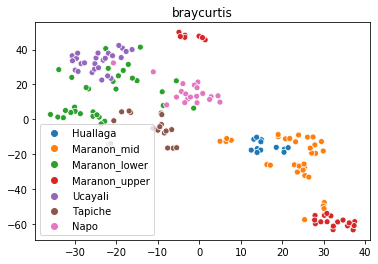

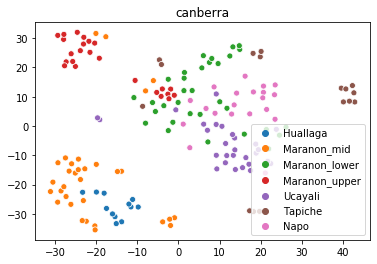

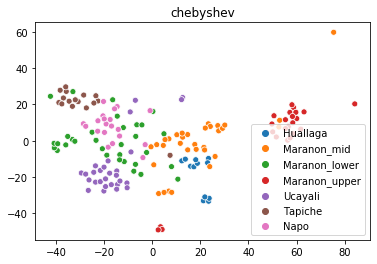

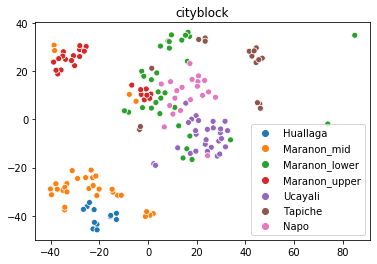

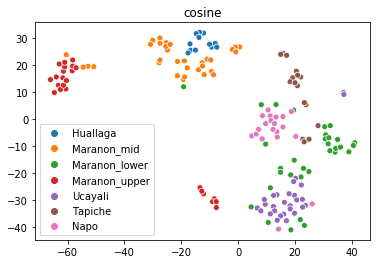

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric dice
  warnings.warn(msg, DataConversionWarning)


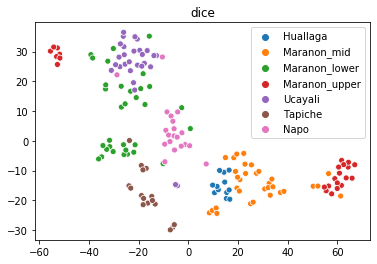

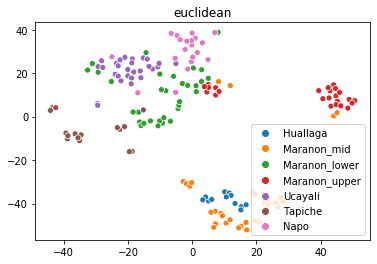

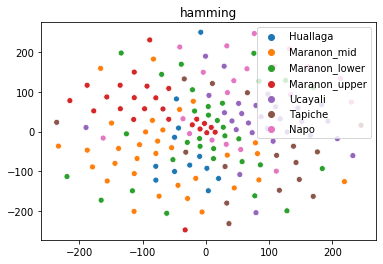

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


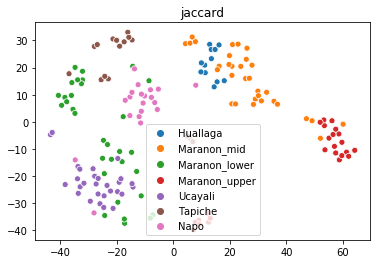

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric kulsinski
  warnings.warn(msg, DataConversionWarning)


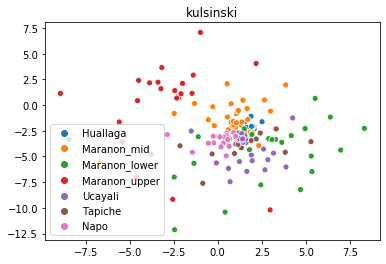

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric matching
  warnings.warn(msg, DataConversionWarning)


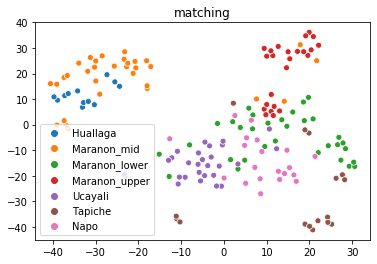

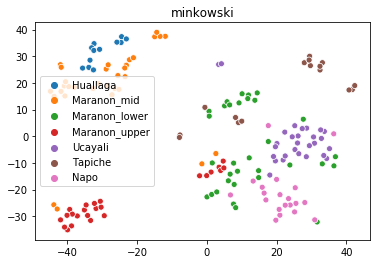

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric rogerstanimoto
  warnings.warn(msg, DataConversionWarning)


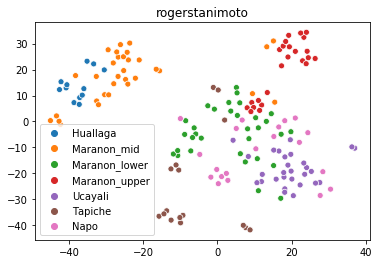

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric russellrao
  warnings.warn(msg, DataConversionWarning)


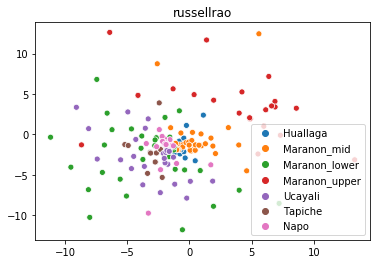

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalmichener
  warnings.warn(msg, DataConversionWarning)


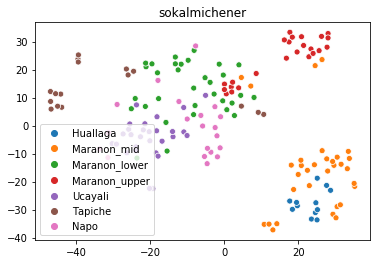

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


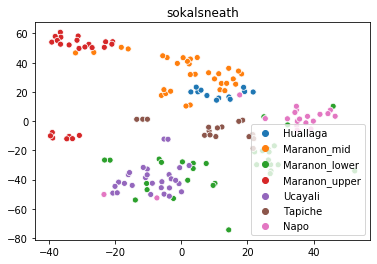

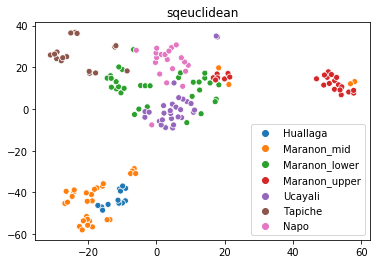

/home/adamingas/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric yule
  warnings.warn(msg, DataConversionWarning)


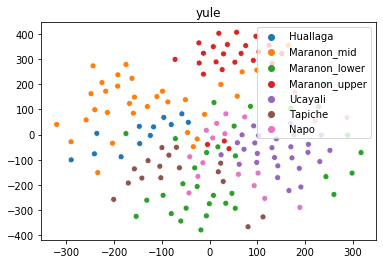

In [79]:
for i in dist_tsne:
    X_tsne = TSNE(metric=i,perplexity=10,method = "exact",n_iter=2000,learning_rate=100).fit_transform(riverdfCssLog)
    plotembedding(X_tsne,title=i)

Reduction of feature size

In [474]:

aggotu =cluster.FeatureAgglomeration(n_clusters=10).fit_transform(riverdfCssLog)

In [526]:
def braykernel(X,Y):
    
    matrix =cdist(X[None,:],Y[None,:],"braycurtis")+1e-2
    
    return(1/matrix)

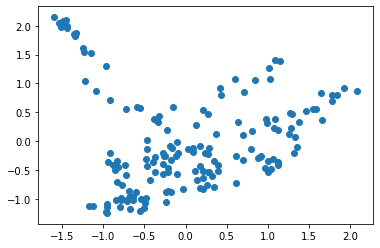

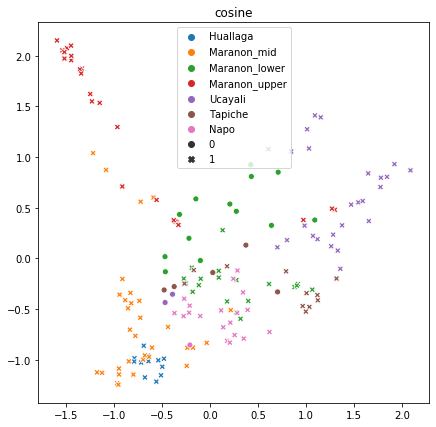

In [529]:
%matplotlib inline
#print(braykernel(riverdf,riverdf).max()     )
kpcaotu =KernelPCA(n_components=2,kernel = braykernel).fit_transform(riverdfCss)
plt.scatter(x = kpcaotu[:,0], y= kpcaotu[:,1])
plotembedding(kpcaotu,"cosine")
plt.show()

# Clustering

We are going to test several custerign algorithms. The challenge is what the input should be and the parameters of the clustering algortihm. For instance do we use the fullotu table or just the rivers. Furthermore do we scale or not? Do we perform dimensionality reduction before and if yes which one whith what metric. The combinations are too large to take all of them into consideration. We will start off with the datasets as they are with no preprocessing, and then use a dimensionality reduction technique using a handfull of metrics if clustering doesn't work out

In [293]:
X_dist = cdist(riverdfCssLog,riverdfCssLog,metric="braycurtis")
X_bio = skbio.stats.ordination.pcoa(X_dist)

kmeans =sklearn.cluster.KMeans(random_state=11235,n_jobs = -1,n_clusters=5).fit(X_bio.samples.to_numpy())

metrics.adjusted_rand_score(wwfdf.Area_group, kmeans.labels_)

/home/adamingas/anaconda3/lib/python3.7/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.15174046595804952 and the largest is 8.291962871119528.
  RuntimeWarning


0.45554997926541996

In [3]:
def add_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [15]:
def cluster_on_map(labels):
    plt.subplots(figsize = (7,7))
    X,Y = (add_jitter(wwfdf.Easting), add_jitter(wwfdf.Northing))
    sns.scatterplot(x= X,y=Y,
                    hue=labels,palette=[(0,0,0)]+sns.color_palette("colorblind", labels.max()),style=wwfdf.Water)

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 6 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 3 3 5 0 0 0 2 5 5 2 5 2 2 6 5 5 2 5 5 5 2 5 2 2 2 2 6 2 2 5 5 6 5 5 2 2
 5 5 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 2 6 6 4 6 4 4 4
 4 4 4 4 4 4 4 4 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 2 5 5 5 6 5 2
 6 6 2 6 6 6 6 6 6 6 6 6 6 6 6 5]
0.42015827728116967


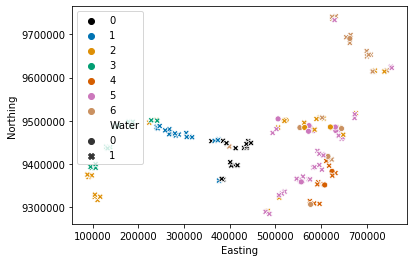

In [13]:
affinitylabels=sklearn.cluster.AffinityPropagation(preference=-7000,damping=0.5).fit_predict(riverdfCssLog)#X_bio.samples.to_numpy())
print(affinitylabels)
print(metrics.adjusted_rand_score(wwfdf.Area_group, affinitylabels))
cluster_on_map(affinitylabels)
#sns.scatterplot(x= wwfdf.Easting,y=wwfdf.Northing,hue=affinitylabels,palette=sns.color_palette("husl", affinitylabels.max()+1))

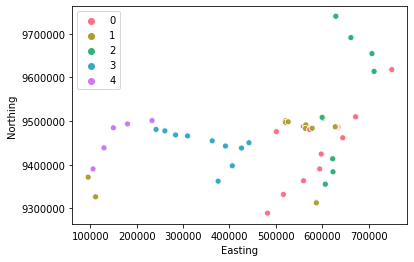

In [213]:
sns.scatterplot(x= wwfdf.Easting,y=wwfdf.Northing,hue=kmeans.labels_,palette=sns.color_palette("husl", kmeans.labels_.max()+1))

In [241]:
Meanlabels = sklearn.cluster.MeanShift(n_jobs=-1,bandwidth=35).fit_predict(riverdfCssLog)

0.5558188907462793

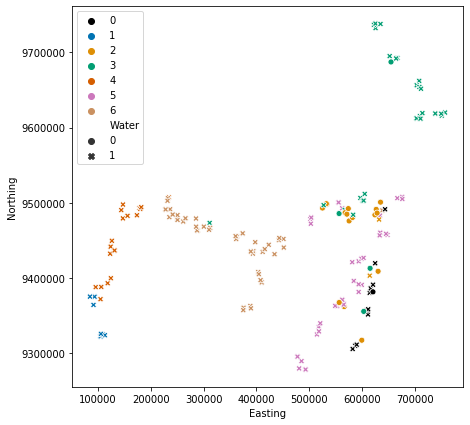

In [16]:
Slabels = sklearn.cluster.SpectralClustering(n_clusters=7,affinity="poly",degree=1).fit_predict(riverdfCssLog)
cluster_on_map(Slabels)
metrics.adjusted_rand_score(wwfdf.Area_group, Slabels)

0.4309876549850911

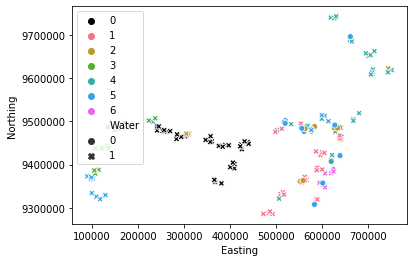

In [445]:
transformeddata =  TSNE(metric="canberra",perplexity=10,method = "exact",n_iter=2000,learning_rate=200).fit_transform(riverdfCssLog)
Agglabels=sklearn.cluster.AgglomerativeClustering(n_clusters=7,affinity="euclidean",linkage = "ward").fit_predict(transformeddata)#X_bio.samples)
cluster_on_map(Agglabels)
metrics.adjusted_rand_score(wwfdf.Area_group, Agglabels)

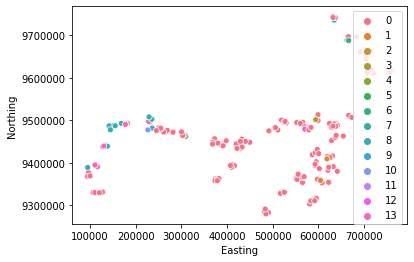

In [259]:
cluster_on_map(Meanlabels)

0.5360538601924564

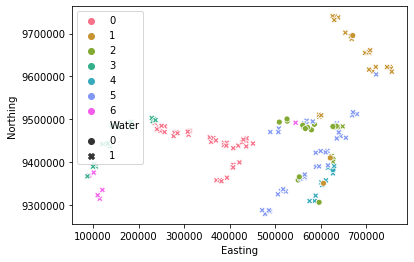

In [315]:
#X_dist = cdist(riverdfCssLog,riverdfCssLog,metric="jaccard")
#Agglabels=sklearn.cluster.AgglomerativeClustering(n_clusters=7,affinity="precomputed",linkage = "complete").fit_predict(X_dist)#X_bio.samples)
Agglabels=sklearn.cluster.AgglomerativeClustering(n_clusters=7,affinity="euclidean",linkage = "ward").fit_predict(riverdfCssLog)#X_bio.samples)
cluster_on_map(Agglabels)
metrics.adjusted_rand_score(wwfdf.Area_group, Agglabels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1  1  1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  2  2 -1 -1  2  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


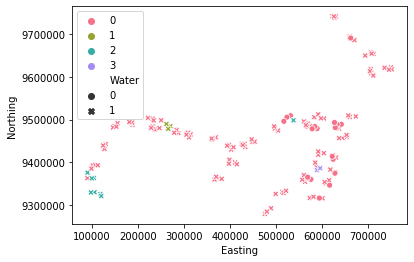

In [405]:
dblabels = sklearn.cluster.DBSCAN(eps=25,metric = "euclidean",min_samples=4).fit_predict(riverdfCssLog)
print(dblabels)
if dblabels.min() ==-1:
    dblabels +=1
cluster_on_map(dblabels)

[ 0 -1  0  0  0 -1  0  0 -1  0  0  0 -1 -1 -1 -1  0 -1  0 -1 -1 -1 -1  0
  0 -1 -1 -1  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0
 -1  0  0 -1 -1 -1  0  0  0  0 -1  0  0 -1 -1 -1 -1  0  0  0  0 -1  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0 -1  1  1 -1 -1  1  1  1  1  1  1  1
 -1 -1  1  1  0  0  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0
 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1]


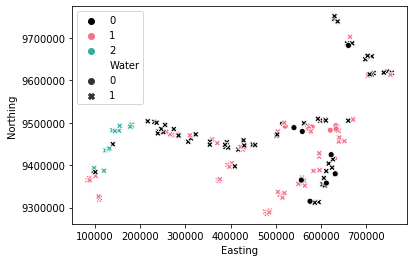

In [417]:
hdlabels=hdbscan.HDBSCAN(min_cluster_size=9).fit_predict(riverdfCssLog)
print(hdlabels)
if hdlabels.min() ==-1:
    hdlabels +=1
cluster_on_map(hdlabels)